In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [251]:
#['User_ID', 'Order_Date', 'Order_Products', 'Order_Amount']
df = pd.read_csv('CDNOW.txt', sep='\s+', names=['User_ID', 'Order_DT', 'Order_Products', 'Order_Amount'])
print(df)

       User_ID  Order_DT  Order_Products  Order_Amount
0            1  19970101               1         11.77
1            2  19970112               1         12.00
2            2  19970112               5         77.00
3            3  19970102               2         20.76
4            3  19970330               2         20.76
5            3  19970402               2         19.54
6            3  19971115               5         57.45
7            3  19971125               4         20.96
8            3  19980528               1         16.99
9            4  19970101               2         29.33
10           4  19970118               2         29.73
11           4  19970802               1         14.96
12           4  19971212               2         26.48
13           5  19970101               2         29.33
14           5  19970114               1         13.97
15           5  19970204               3         38.90
16           5  19970411               3         45.55
17        

In [252]:
df.describe()

,User_ID,Order_DT,Order_Products,Order_Amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [269]:
df['Order_Date'] = pd.to_datetime(df.Order_DT, format='%Y%m%d')
# df['Month'] = df.Order_Date.dt.month #纯月份数，不带年份
# df
df['Month'] = df.Order_Date.values.astype('datetime64[M]') #带有年份的月份分类
df

,User_ID,Order_DT,Order_Products,Order_Amount,Order_Date,Month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
5,3,19970402,2,19.54,1997-04-02,1997-04-01
6,3,19971115,5,57.45,1997-11-15,1997-11-01
7,3,19971125,4,20.96,1997-11-25,1997-11-01
8,3,19980528,1,16.99,1998-05-28,1998-05-01
9,4,19970101,2,29.33,1997-01-01,1997-01-01


## 商品销售静态分析

In [254]:
Groupby_UserID = df.groupby('User_ID').sum()
Groupby_UserID.head()
# 此处的意义为计算每个用户一共买了多少产品，消费了多少钱

,Order_DT,Order_Products,Order_Amount
User_ID,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [255]:
Groupby_UserID.describe()
#查看平均数
#平均每个用户订购产品数量为7.12个，消费金额为106.08
#购买的最多的用户购买了1033个

,Order_DT,Order_Products,Order_Amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


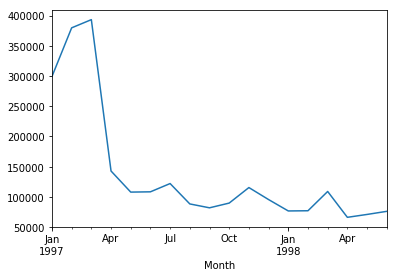

In [256]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df.groupby('Month').Order_Amount.sum().plot()
#月销售额的变化曲线

## 商品销售动态分析

In [257]:
amount = df.groupby('Order_Date').count()

## 用户消费行为静态分析

### 各用户购买数量分析

In [258]:
#各用户累积购买数量分析
df.groupby('User_ID')['Order_Products'].sum()

User_ID
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: Order_Products, Length: 23570, dtype: int64

In [259]:
#各用户最大单笔购买数量分析
df.groupby('User_ID')['Order_Products'].max()

User_ID
1         1
2         5
3         5
4         2
5         4
6         1
7         9
8         7
9         2
10        3
11        1
12        4
13        4
14        2
15        4
16        4
17        5
18        1
19       10
20       27
21        3
22        1
23        2
24        3
25        3
26        3
27        6
28        3
29        4
30        1
         ..
23541     1
23542     5
23543     2
23544     5
23545     1
23546     1
23547     1
23548     2
23549     2
23550     2
23551     4
23552     2
23553     4
23554     2
23555     4
23556     3
23557     1
23558     4
23559     3
23560     1
23561     3
23562     2
23563     2
23564     3
23565     1
23566     2
23567     1
23568     4
23569     2
23570     3
Name: Order_Products, Length: 23570, dtype: int64

### 各用户购买金额分析

In [260]:
#各用户累积购买金额分析
df.groupby('User_ID')['Order_Amount'].sum()

User_ID
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: Order_Amou

In [261]:
#各用户最大单笔消费金额分析
df.groupby('User_ID')['Order_Amount'].max()

User_ID
1         11.77
2         77.00
3         57.45
4         29.73
5         46.46
6         20.99
7        138.50
8         50.43
9         41.98
10        39.31
11        19.30
12        57.06
13        72.94
14        29.92
15        52.87
16        31.60
17        73.22
18        14.96
19       163.35
20       363.60
21        63.34
22        14.37
23        24.74
24        47.28
25        24.98
26        59.97
27        83.41
28        39.51
29        67.31
30        14.37
          ...  
23541     46.37
23542     77.43
23543     50.76
23544     48.68
23545     24.99
23546     13.97
23547     11.77
23548     23.54
23549     27.13
23550     25.28
23551    102.36
23552     26.93
23553     49.30
23554     24.60
23555     49.96
23556     45.74
23557     14.37
23558     48.22
23559     52.80
23560     18.36
23561     37.05
23562     29.33
23563     47.98
23564     46.47
23565     11.77
23566     36.00
23567     20.97
23568     83.74
23569     25.74
23570     51.12
Name: Order_Amou

### 各用户购买次数分析

In [262]:
df.groupby('User_ID').count()

,Order_DT,Order_Products,Order_Amount,Order_Date,Month
User_ID,,,,,
1,1,1,1,1,1
2,2,2,2,2,2
3,6,6,6,6,6
4,4,4,4,4,4
5,11,11,11,11,11
6,1,1,1,1,1
7,3,3,3,3,3
8,8,8,8,8,8
9,3,3,3,3,3


## 用户消费行为动态分析

In [263]:
#各用户第一次购买时间分析
df.groupby('User_ID')['Order_Date'].min()

User_ID
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
6       1997-01-01
7       1997-01-01
8       1997-01-01
9       1997-01-01
10      1997-01-21
11      1997-01-01
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-01-01
17      1997-01-01
18      1997-01-04
19      1997-01-01
20      1997-01-01
21      1997-01-01
22      1997-01-01
23      1997-01-01
24      1997-01-01
25      1997-01-01
26      1997-01-01
27      1997-01-07
28      1997-01-01
29      1997-01-01
30      1997-01-01
           ...    
23541   1997-03-25
23542   1997-03-25
23543   1997-03-25
23544   1997-03-25
23545   1997-03-25
23546   1997-03-25
23547   1997-03-25
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-03-25
23552   1997-03-25
23553   1997-03-25
23554   1997-03-25
23555   1997-03-25
23556   1997-03-25
23557   1997-03-25
23558   1997-03-25
23559   1997-03-25
23560   1997-03-25
23561   1997-03-25
2356

In [264]:
#各用户最后一次购买时间分析
df.groupby('User_ID')['Order_Date'].max()

User_ID
1       1997-01-01
2       1997-01-12
3       1998-05-28
4       1997-12-12
5       1998-01-03
6       1997-01-01
7       1998-03-22
8       1998-03-29
9       1998-06-08
10      1997-01-21
11      1998-02-20
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-09-10
17      1997-01-01
18      1997-01-04
19      1997-06-10
20      1997-01-18
21      1997-01-13
22      1997-01-01
23      1997-01-01
24      1998-01-20
25      1998-06-08
26      1997-01-26
27      1997-01-12
28      1997-03-08
29      1998-04-26
30      1997-02-14
           ...    
23541   1997-04-02
23542   1997-03-25
23543   1997-03-25
23544   1998-01-24
23545   1997-03-25
23546   1997-03-25
23547   1997-04-07
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-09-11
23552   1997-04-03
23553   1997-03-28
23554   1998-02-01
23555   1998-06-10
23556   1998-06-07
23557   1997-03-25
23558   1998-02-25
23559   1997-06-27
23560   1997-03-25
23561   1998-05-29
2356

In [265]:
#各用户最后一次消费与当前时间间隔
from datetime import datetime
Last_Consumption_Time = df.groupby('User_ID')['Order_Date'].max()
now = datetime.now()
now - Last_Consumption_Time

User_ID
1       8183 days 13:22:25.925120
2       8172 days 13:22:25.925120
3       7671 days 13:22:25.925120
4       7838 days 13:22:25.925120
5       7816 days 13:22:25.925120
6       8183 days 13:22:25.925120
7       7738 days 13:22:25.925120
8       7731 days 13:22:25.925120
9       7660 days 13:22:25.925120
10      8163 days 13:22:25.925120
11      7768 days 13:22:25.925120
12      8183 days 13:22:25.925120
13      8183 days 13:22:25.925120
14      8183 days 13:22:25.925120
15      8183 days 13:22:25.925120
16      7931 days 13:22:25.925120
17      8183 days 13:22:25.925120
18      8180 days 13:22:25.925120
19      8023 days 13:22:25.925120
20      8166 days 13:22:25.925120
21      8171 days 13:22:25.925120
22      8183 days 13:22:25.925120
23      8183 days 13:22:25.925120
24      7799 days 13:22:25.925120
25      7660 days 13:22:25.925120
26      8158 days 13:22:25.925120
27      8172 days 13:22:25.925120
28      8117 days 13:22:25.925120
29      7703 days 13:22:25.925120
30    

In [266]:
#各用户生命周期分析
Last_Consumption_Time = df.groupby('User_ID')['Order_Date'].max()
First_Consumption_Time = df.groupby('User_ID')['Order_Date'].min()
Life_Period = Last_Consumption_Time - First_Consumption_Time
Life_Period

User_ID
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
6         0 days
7       445 days
8       452 days
9       523 days
10        0 days
11      415 days
12        0 days
13        0 days
14        0 days
15        0 days
16      252 days
17        0 days
18        0 days
19      160 days
20       17 days
21       12 days
22        0 days
23        0 days
24      384 days
25      523 days
26       25 days
27        5 days
28       66 days
29      480 days
30       44 days
          ...   
23541     8 days
23542     0 days
23543     0 days
23544   305 days
23545     0 days
23546     0 days
23547    13 days
23548     0 days
23549     0 days
23550     0 days
23551   170 days
23552     9 days
23553     3 days
23554   313 days
23555   442 days
23556   439 days
23557     0 days
23558   337 days
23559    94 days
23560     0 days
23561   430 days
23562     0 days
23563   193 days
23564   250 days
23565     0 days
23566     0 days
23567     0 days
23568 

In [ ]:
#各用户首次回购周期
min_index = df.groupby(df['User_ID']).apply(lambda x: x[x['Order_Date']==x['Order_Date'].min()]).index
# min_index = df.groupby(['User_ID'])['Order_Date'].agg(max)
df1 = df.drop([x['Order_Date'] for x in min_index],axis=0)
# min_index

In [241]:
#各用户平均购买周期


In [271]:
#各用户各月复购率
pivoted_counts=df.pivot_table(index='User_ID',columns='Month',values='Order_DT',aggfunc='count').fillna(0)
columns_month=df.Month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [272]:
pivoted_counts_reorder=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)#统计消费用户是否复购
pivoted_counts_reorder.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

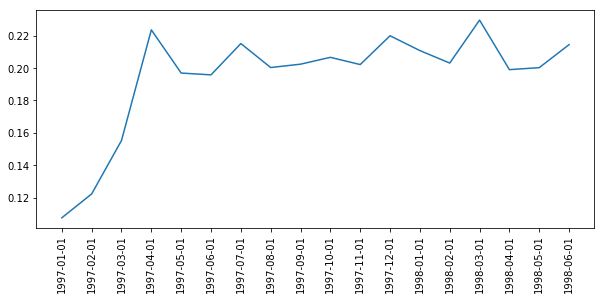

In [273]:
month_counts_reorder_rate=pd.DataFrame(pivoted_counts_reorder.sum()/pivoted_counts_reorder.count())#计算复购率
plt.figure(figsize=(10,4))
plt.plot(month_counts_reorder_rate)
plt.xticks(rotation=90)


In [274]:
#各用户各月回购率
def func_repurchase(data):
    status=[]
    for i in range(data.count()-1):
        if data[i]>0:
            if data[i+1]>0:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=data.index)
repurchase=pivoted_counts.apply(func_repurchase,axis=1)
repurchase.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

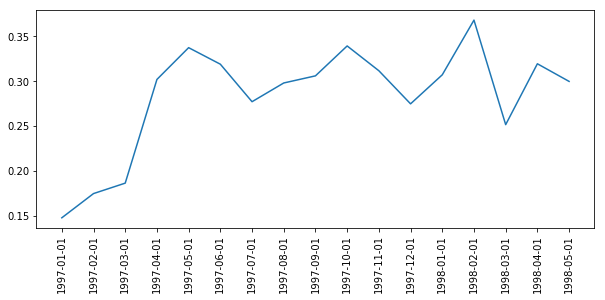

In [275]:
repurchase_rate=pd.DataFrame(repurchase.sum()/repurchase.count())#计算复购率
plt.figure(figsize=(10,4))
plt.plot(repurchase_rate)
plt.xticks(rotation=90)